In [17]:
import pandas as pd
import sys
import os
import numpy as np
import pylab as pl
import urllib2
import json
import os
import csv
import geopandas as gp
import scipy.stats 
%pylab inline
import statsmodels.api as sm
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


In [18]:
jan15 = pd.read_csv(os.getenv('PUI2015')+'/HW8/201501-citibike-tripdata.csv')

In [19]:
jan15.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [20]:
kelly_colors_hex = [
    '#FFB300', # Vivid Yellow
    '#803E75', # Strong Purple
    '#FF6800', # Vivid Orange
    '#A6BDD7', # Very Light Blue
    '#C10020', # Vivid Red
    '#CEA262', # Grayish Yellow
    '#817066', # Medium Gray
    '#007D34', # Vivid Green
    '#F6768E', # Strong Purplish Pink
    '#00538A', # Strong Blue
    '#FF7A5C', # Strong Yellowish Pink
    '#53377A', # Strong Violet
    '#FF8E00', # Vivid Orange Yellow
    '#B32851', # Strong Purplish Red
    '#F4C800', # Vivid Greenish Yellow
    '#7F180D', # Strong Reddish Brown
    '#93AA00', # Vivid Yellowish Green
    '#593315', # Deep Yellowish Brown
    '#F13A13', # Vivid Reddish Orange
    '#232C16', # Dark Olive Green
    ]

newparams = {
  "lines.linewidth": 2.0,
  "axes.edgecolor": "#aaaaaa",
  "patch.linewidth": 1.0,
  "legend.fancybox": 'false',
  "axes.color_cycle": kelly_colors_hex,
  "axes.facecolor": "#ffffff",
  "axes.labelsize": "large",
  "axes.grid": 'false',
  "patch.edgecolor": "#555555",
  "axes.titlesize": "x-large",
  "svg.embed_char_paths": "path",
}
pl.rcParams.update(newparams)

In [21]:
jan15.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1


In [30]:
#split data into male and female


jan15male = jan15[jan15['gender'] == 1]
jan15male.reset_index(level=None, drop=False, inplace=True)

jan15female = jan15[jan15['gender'] == 2]
jan15female.reset_index(level=None, drop=False, inplace=True)
#print jan15male[:200]

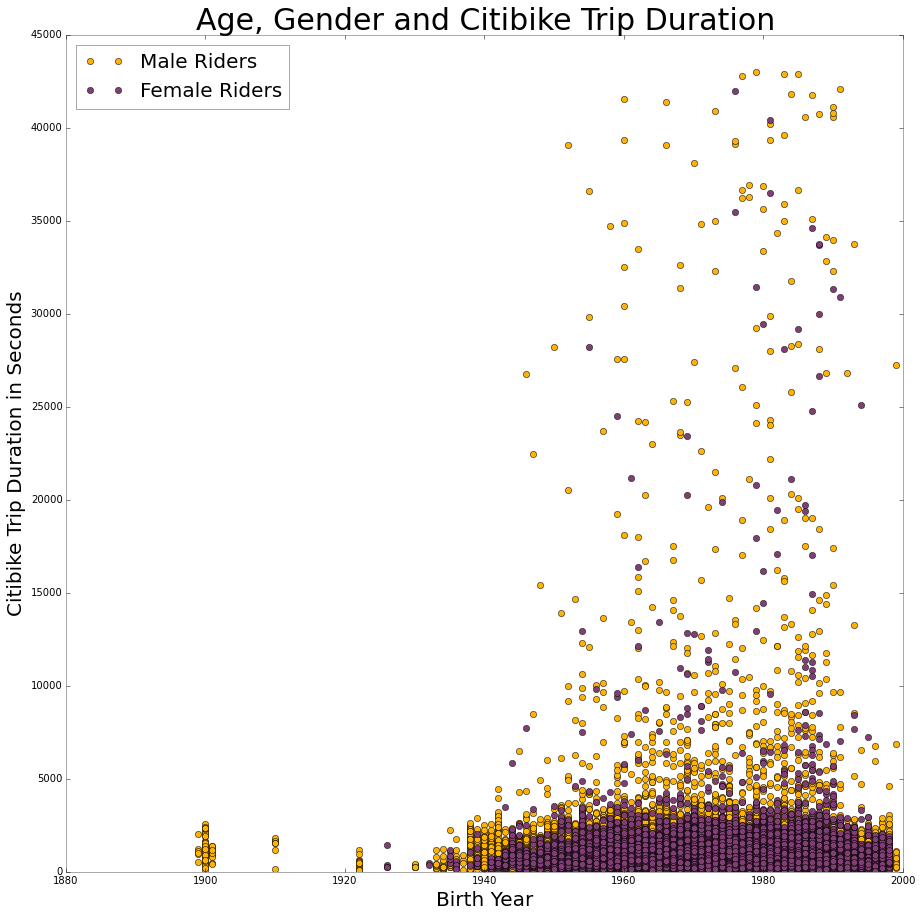

In [36]:
#0 is unknown
#1 is male
#2 is female

pl.figure(figsize = (15,15))
pl.plot(jan15male['birth year'], jan15male['tripduration'], 'o', label = 'Male Riders')
pl.plot(jan15female['birth year'], jan15female['tripduration'], 'o', label = 'Female Riders')
pl.xlabel('Birth Year', fontsize = 20)
pl.ylabel('Citibike Trip Duration in Seconds', fontsize = 20) 
pl.title ('Age, Gender and Citibike Trip Duration', fontsize = 30)
pl.legend(loc = 'best', fontsize = 20)